# **Processamento de Imagens e Imagens**
Engenharia da Computação - 2021.01

**Wesley de Oliveira Mendes, 828.507**

## Tarefa 04 - Contornos e Contagem de Objetos
- Objetivo
    - Aplicar técnicas fundamentais de processamento de imagens.


### Download das imagens

In [1]:
!mkdir data
!wget 'https://i.imgur.com/9iSzKux.jpg' -O 'data/objects.jpg'
!wget 'https://i.imgur.com/g6XaV7S.jpg' -O 'data/apple.jpg'
!wget 'https://i.imgur.com/NnUQH7I.jpg' -O 'data/coin.jpg'

--2021-04-19 04:07:38--  https://i.imgur.com/9iSzKux.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35473 (35K) [image/jpeg]
Saving to: ‘data/objects.jpg’

data/objects.jpg    100%[===================>]  34.64K  --.-KB/s    in 0.002s  

2021-04-19 04:07:38 (18.2 MB/s) - ‘data/objects.jpg’ saved [35473/35473]

--2021-04-19 04:07:38--  https://i.imgur.com/g6XaV7S.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14341 (14K) [image/jpeg]
Saving to: ‘data/apple.jpg’

data/apple.jpg      100%[===================>]  14.00K  --.-KB/s    in 0s      

2021-04-19 04:07:38 (95.6 MB/s) - ‘data/apple.jpg’ saved [14341/14341]

--2021-04-19 04:07:38--  https://i.imgur.com/NnUQH7I.jpg
Resolving i.imgur.com (i.imgur.com)... 151.10

### Imports

In [2]:
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Code

#### Exercício 1
Utiliza técnicas de processamento de imagens para:
- Carregar uma imagem digital que contenha três objetos diferentes.
- Aplicar a técnica de bounding box (boundRect).
- Exibir o bounding bounding box de cada objeto.
- Apresentar na tela a quantidade de objetos.

In [3]:
# Carregar uma imagem digital que contenha três objetos diferentes.
exe1_img1 = cv.imread('data/objects.jpg')

exe1_img1 = cv.cvtColor(exe1_img1, cv.COLOR_BGR2RGB)
exe1_img2 = cv.cvtColor(exe1_img1, cv.COLOR_RGB2GRAY)

In [4]:
# Aplicar a técnica de bounding box (boundRect).
th, exe1_img2 = cv.threshold(exe1_img2, 127, 255, cv.THRESH_BINARY)

outlines, order = cv.findContours(exe1_img2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

exe1_img3 = exe1_img1.copy()
outlines = sorted(outlines, key=cv.contourArea)
cv.drawContours(exe1_img3, outlines, 1, (255, 0, 0), 5)

exe1_img4 = exe1_img1.copy()
exe1_img5 = exe1_img1.copy()

count_outlines = len(outlines)

outlines.pop(4)
outlines.pop(0)

for contour in outlines:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(exe1_img4, (x, y), (x + w, y + h), (255, 0, 0), 5)

    (x, y), radius = cv.minEnclosingCircle(contour)
    center = (int(x), int(y))
    _ = cv.circle(exe1_img5, center, int(radius), (255, 0, 0), 5)

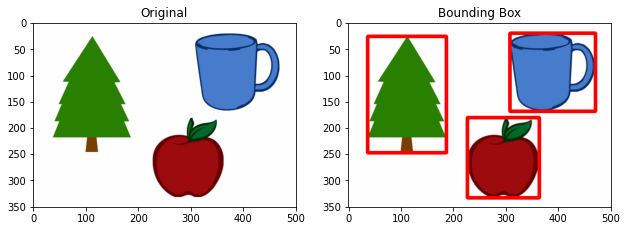

In [5]:
# Exibir o bounding bounding box de cada objeto.
plt.figure(figsize=(16, 12))
plt.subplot(131), plt.imshow(exe1_img1), plt.title('Original')
plt.subplot(132), plt.imshow(exe1_img4), plt.title('Bounding Box')
plt.show()

In [6]:
# Apresentar na tela a quantidade de objetos.
print(f'Quantidade de contornos encontrados: {count_outlines}')
print(f'Quantidade de contornos utilizados: {len(outlines)}')

Quantidade de contornos encontrados: 5
Quantidade de contornos utilizados: 3


#### Exercício 2
Utiliza técnicas de processamento de imagens para:
- Carregar uma imagem digital da sua preferência.
- Demonstrar o uso da técnica de Polígono Delimitador Aproximado (approxPolyDP).
- Demonstrar o uso da técnica de Convex Hull (convexHull).

In [7]:
# Carregar uma imagem digital da sua preferência.
exe2_img1 = cv.imread('data/apple.jpg')

exe2_img1 = cv.cvtColor(exe2_img1, cv.COLOR_BGR2RGB)
exe2_img2 = cv.cvtColor(exe2_img1, cv.COLOR_RGB2GRAY)

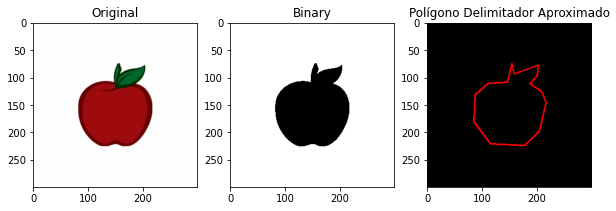

In [8]:
# Demonstrar o uso da técnica de Polígono Delimitador Aproximado (approxPolyDP).
exe2_img2 = (255 - exe2_img2)  # inverte image color

th, exe2_img2 = cv.threshold(exe2_img2, 127, 255, cv.THRESH_BINARY)
outlines, order = cv.findContours(exe2_img2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

exe2_img3 = np.zeros((exe2_img1.shape[0], exe2_img1.shape[1]), dtype=np.uint8)
exe2_img3 = cv.cvtColor(exe2_img3, cv.COLOR_GRAY2RGB)

contour = outlines[0]
epsilon = 0.009 * cv.arcLength(contour, True)
aprox = cv.approxPolyDP(contour, epsilon, True)
_ = cv.drawContours(exe2_img3, [aprox], -1, (255, 0, 0), 2)

plt.figure(figsize=(10, 8))
plt.subplot(131), plt.imshow(exe2_img1), plt.title('Original')
plt.subplot(132), plt.imshow(exe2_img2, cmap='binary'), plt.title('Binary')
plt.subplot(133), plt.imshow(exe2_img3), plt.title('Polígono Delimitador Aproximado')
plt.show()

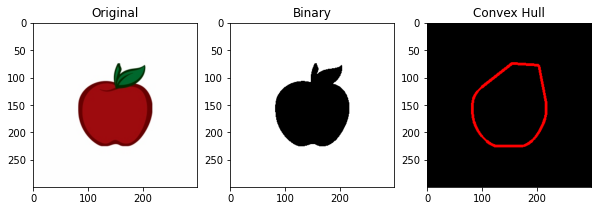

In [9]:
# Demonstrar o uso da técnica de Convex Hull (convexHull).
exe2_img4 = np.zeros((exe2_img1.shape[0], exe2_img1.shape[1]), dtype=np.uint8)
exe2_img4 = cv.cvtColor(exe2_img4, cv.COLOR_GRAY2RGB)

hull = cv.convexHull(contour)
_ = cv.drawContours(exe2_img4, [hull], -1, (255, 0, 0), 3)

plt.figure(figsize=(10, 8))
plt.subplot(131), plt.imshow(exe2_img1), plt.title('Original')
plt.subplot(132), plt.imshow(exe2_img2, cmap='binary'), plt.title('Binary')
plt.subplot(133), plt.imshow(exe2_img4), plt.title('Convex Hull')
plt.show()

#### Exercício 3
Utiliza técnicas de processamento de imagens para:
- Carregar a imagem abaixo:
    - https://drive.google.com/file/d/1g4EAgCO8MpP5w3EYV7GOU0eBbHuYAgDq/view?usp=sharing

- Aplicar a técnica Minimum Enclosing Circle e exibir o contornos das circunferências.
- Determinar a área da circunferência de cada moeda.
- Apresentar os resultados.

In [10]:
# Carregar a imagem abaixo:
# https://drive.google.com/file/d/1g4EAgCO8MpP5w3EYV7GOU0eBbHuYAgDq/view?usp=sharing
exe3_img1 = cv.imread('data/coin.jpg')

exe3_img1 = cv.cvtColor(exe3_img1, cv.COLOR_BGR2RGB)
exe3_img2 = cv.cvtColor(exe3_img1, cv.COLOR_RGB2GRAY)

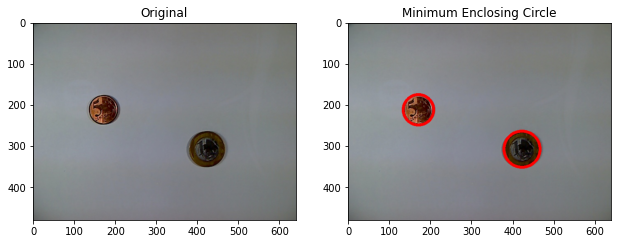

In [11]:
# Aplicar a técnica Minimum Enclosing Circle e exibir o outlines das circunferências.
th, exe3_img2 = cv.threshold(exe3_img2, 50, 255, cv.THRESH_BINARY)
outlines, order = cv.findContours(exe3_img2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

exe3_img3 = exe3_img1.copy()
outlines = sorted(outlines, key=cv.contourArea)
cv.drawContours(exe3_img3, outlines, 1, (255, 0, 0), 10)

exe3_img4 = exe3_img1.copy()
exe3_img5 = exe3_img1.copy()

circle_radius = []

for contour in outlines[-3:-1]:
    (x, y), radius = cv.minEnclosingCircle(contour)
    circle_radius.append(radius)
    center = (int(x), int(y))
    _ = cv.circle(exe3_img5, center, int(radius), (255, 0, 0), 5)

# Apresentar os resultados.
plt.figure(figsize=(16, 12))
plt.subplot(131), plt.imshow(exe3_img1), plt.title('Original')
plt.subplot(132), plt.imshow(exe3_img5), plt.title('Minimum Enclosing Circle')
plt.show()

In [12]:
# Determinar a área da circunferência de cada moeda.
circle_radius.sort()

area1 = math.pi * (circle_radius[0]**2)
area2 = math.pi * (circle_radius[1]**2)

print(f'Área da Circunferência Moeda 5 centavos: {area1:.2f}')
print(f'Área da Circunferência Moeda 1 real: {area2:.2f}')

Área da Circunferência Moeda 5 centavos: 4326.62
Área da Circunferência Moeda 1 real: 6340.25
